In [47]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

### Сначала вручную

In [67]:
# шаг алгоритма
alpha = 0.001

In [68]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

(100, 1)
[[ 1.00000000e+00 -2.73252853e+00]
 [ 1.00000000e+00  5.53597378e+00]
 [ 1.00000000e+00  2.42271161e-04]
 [ 1.00000000e+00  5.60540775e+00]
 [ 1.00000000e+00 -9.17515745e-01]]
[0 1 0 1 0]


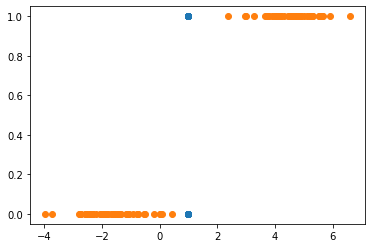

In [69]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=1)
print(X.shape)

X = np.c_[ np.ones(100), X]
print(X[:5])
print(y[:5])
pylab.plot(X, y, 'o')
pylab.show()

In [70]:
# функция сигмоиды
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Кросс-Эндропия 
# для логистической регрессии T - целевая переменная отнесения к классу 1 или 0 
# Y – результат логистической регрессии.
def cross_entropy(N, T, Y):
    return -1/N * np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y))

def gradient_log_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. 
    Логистическая регрессия - и функция потерь кросс-энтропия
    На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = sigmoid(np.dot(x, theta)) # матричное произведение
        J = cross_entropy(m, y, hypothesis)
        #print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, hypothesis - y) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [72]:
%%time
theta = gradient_log_descent_2(alpha, X, y, 1000)
m = X.shape[0] 


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


ValueError: operands could not be broadcast together with shapes (100,) (100,2) 

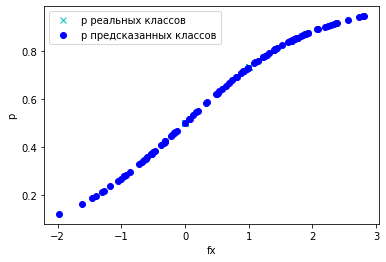

In [26]:
# построим полученную линию из theta
for i in range(X.shape[1]):
    y_predict = theta[0] + theta[1]*X 
    
#print(y_predict[:5])
# определим вероятность классов
# сигмоида для предсказаний
p = []
#print(y_predict.T)
for fx in y_predict.T[1]:
    logit = sigmoid(fx)
    p.append(logit)

# сигмоида для исходных значений 
p_orig = []

for fx in y:
    logit = sigmoid(fx)
    p_orig.append(logit)

# рисуем результат
pylab.plot(y, p_orig,'x', color='c', label='p реальных классов')
pylab.plot(y_predict.T[1],p,'o', color='b', label='p предсказанных классов')
pylab.xlabel('fx')
pylab.ylabel('p')
pylab.legend(loc='upper left')
pylab.show()

### Используем готовые методы

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [64]:
model = LogisticRegression()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0